<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_12_%EC%BB%B4%ED%93%A8%ED%84%B0_%EB%B9%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
inception3_net = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet',##경연대회에서 사용했던 가중치이다.
                                                   input_shape=None, pooling=None, classes=1000) ## 데이터를 천가지로 분류한다는 것

96112376/96112376 [==============================] - 5s 0us/step


In [3]:
inception3_net.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

보면 파라미터 수가 굉장히 많다.

파라미터수가 2천 300만개 된다.

이게 인셉션3이다.

ResNet - 잔차 네트워크
- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공합니다.
- 네트워크의 깊이가 깊어질수록 경사가 소실(가중치 손실)되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
(그림 참고하기)
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음


<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


In [4]:
from tensorflow.python.framework.ops import IndexedSlicesValue
resnet50 = tf.keras.applications.ResNet50(
    include_top=True, weights='imagenet',
    input_tensor=None, input_shape=None,
    pooling=None, classes=1000
)

102967424/102967424 [==============================] - 5s 0us/step


In [5]:
resnet50.summary()  ##출력값은 위의 그림대로 되어있다.

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

< API >

A: 에플리케이션

P: 프로그래밍

I: 인터페이스 의 약자이다.

응용 프로그램간의 인터페이스이다.

케글에 있는 데이터를 쉽게 가져올수 있도록 한다.

### < API 사용방법 >

In [6]:
# 케글 API 설치
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


커글 로그인 하고 account 들어가기

create account 들어가고

받은 API를 워킹디렉토리에 넣기(찾기 쉽게)

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chlwldnjs","key":"5c854137e1ac16be6f3138c98573792f"}'}

In [8]:
!mkdir ~/.kaggle  ##새로 만든 폴더
!cp kaggle.json ~/.kaggle/  ## 새로 만든 폴더를 복사하기
!chmod 600 ~/.kaggle/kaggle.json ##권한주기

In [9]:
!kaggle competitions download -c dogs-vs-cats ##데이터 가져오기

100% 811M/812M [00:37<00:00, 23.8MB/s]
100% 812M/812M [00:37<00:00, 22.4MB/s]


In [10]:
!ls ##가져온 데이터 보기

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [11]:
!unzip -qq dogs-vs-cats.zip ##zip으로 가져왔으니 해제하기
!unzip -qq train.zip

In [12]:
!ls ##잘 해제되었는지 확인하기

dogs-vs-cats.zip  kaggle.json  sampleSubmission.csv  train
drive		  sample_data  test1.zip	     train.zip


In [13]:
# 1. 데이터 처리
import os, shutil, pathlib

original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname,
                      dst=dir/fname)
      
make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

#### pathlib 모듈
파일, 디렉토리(폴더)의 경로를 객체로써  조작하거나 처리. 


파일명 혹은 부모 디렉토리를 알아내거나 경로의 목록을 얻어내거나 파일을 작성하거나 

삭제하는 등 대략적인 파일 관련된 처리가 가능.

In [14]:
# 2. 분류 모델 만들기
## 함수형 방법이다.
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  ##아웃풋은 1이다.
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy',  ##컴파일의 목적? 훈련을 어떻게 시키라는 가이드이다.
              optimizer='rmsprop',  ## 최적화 방법을 제시한다.
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_94 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [16]:
# 3. 데이터 전처리
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir/'train',
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir/'validation',
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir/'test',
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


딥러닝은 하나씩 처리하는게 아니라 묶어서 처리하기 때문에

batch_size를 정해줘야한다.

한번 학습할때 들어가는 데이터의 묶음이라고 보면 된다.

In [17]:
# 4. 모델 훈련
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scatch.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 14s 26ms/step - loss: 0.7453 - accuracy: 0.5205 - val_loss: 0.6839 - val_accuracy: 0.6000
Epoch 2/30
63/63 [==============================] - 1s 20ms/step - loss: 0.7009 - accuracy: 0.5300 - val_loss: 0.6946 - val_accuracy: 0.5610
Epoch 3/30
63/63 [==============================] - 1s 20ms/step - loss: 0.7283 - accuracy: 0.5820 - val_loss: 0.6370 - val_accuracy: 0.6330
Epoch 4/30
63/63 [==============================] - 1s 20ms/step - loss: 0.6800 - accuracy: 0.6470 - val_loss: 0.6398 - val_accuracy: 0.6220
Epoch 5/30
63/63 [==============================] - 1s 21ms/step - loss: 0.6674 - accuracy: 0.6570 - val_loss: 0.5944 - val_accuracy: 0.6860
Epoch 6/30
63/63 [==============================] - 1s 20ms/step - loss: 0.5756 - accuracy: 0.7035 - val_loss: 0.8022 - val_accuracy: 0.5920
Epoch 7/30
63/63 [==============================] - 1s 20ms/step - loss: 0.5492 - accuracy: 0.7145 - val_loss: 0.7767 - val_accuracy: 0.6340
Epoch 8/30
6

callbacks는 가장 최적의 모델을 저장하는 기능이 있다.

얼리 스타핑도 있다.

In [18]:
test_model = keras.models.load_model("convnet_from_scatch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 9ms/step - loss: 0.6107 - accuracy: 0.6705
Test accuracy: 0.670


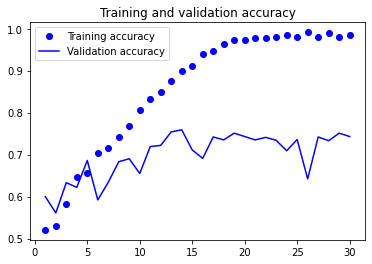

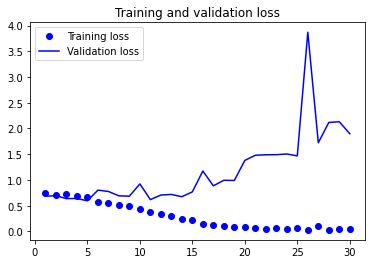

In [19]:
# 훈련 과정의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

위에 점은 train 선은 val 쭉 가다가 벌어지는 부분은 과적합이다.

에폭은 왜 하는걸까?? 반복학습으로 인해 성능을 높이려고

하지만 성능이 더이상 개선되지 않는다는걸 아는 방법은 과적합일때를 보면 된다.

과적합이 본격적으로 나타난 시기는 8정도
하지만 val은 조금 개선이 된다.

너무 미세하면 여기서 멈추는게 낫지만
비용이 별로 들지 않으면 조금 더 지나서 높은걸로 잡아도 된다.

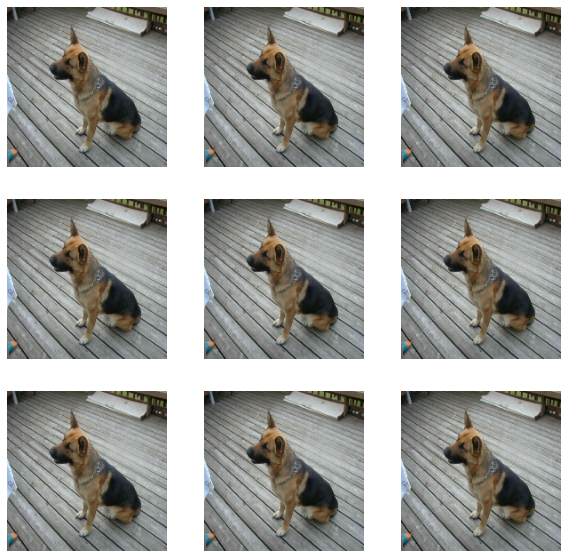

In [20]:
# 5. 데이터 증식
## 데이터 증식 단계 정의
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

## 증식된 훈련 데이터 이미지 출력하기
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [21]:
# 이미지 증식과 드롭아웃을 포함한 컨브넷 만들기
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)  ## 50% dropout 하겠다.
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [22]:
# 규제(드롭아웃)를 추가한 컨브넷 훈련
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 4s 37ms/step - loss: 0.7201 - accuracy: 0.5250 - val_loss: 0.6914 - val_accuracy: 0.5480
Epoch 2/100
63/63 [==============================] - 2s 35ms/step - loss: 0.7224 - accuracy: 0.5350 - val_loss: 0.6848 - val_accuracy: 0.5220
Epoch 3/100
63/63 [==============================] - 2s 34ms/step - loss: 0.7000 - accuracy: 0.5685 - val_loss: 0.6699 - val_accuracy: 0.6080
Epoch 4/100
63/63 [==============================] - 2s 34ms/step - loss: 0.6824 - accuracy: 0.6090 - val_loss: 0.6567 - val_accuracy: 0.5780
Epoch 5/100
63/63 [==============================] - 2s 35ms/step - loss: 0.6578 - accuracy: 0.6335 - val_loss: 0.6419 - val_accuracy: 0.6420
Epoch 6/100
63/63 [==============================] - 2s 34ms/step - loss: 0.6680 - accuracy: 0.6325 - val_loss: 0.6858 - val_accuracy: 0.5680
Epoch 7/100
63/63 [==============================] - 2s 34ms/step - loss: 0.6324 - accuracy: 0.6465 - val_loss: 0.6578 - val_accuracy: 0.6070
Epoch 

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 10ms/step - loss: 0.5213 - accuracy: 0.8365
Test accuracy: 0.836


출력결과를 전과 비교하면 개선이 되었다

#### 사전 훈련된 모델 활용

In [24]:
# VGG16 합성곱 기반 층 만들기
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,  ## 뜻은? 끝의 댄스층을 연결하지 않겠다는것 
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [25]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

군락이 5개이다.

뒤에 보면 완전 연결층이 없다.

원래는 있는데 아까 include_top을 False 했기 때문에 없다.

#### 데이터 증식을 사용하지 않는 빠른 특성 추출

In [26]:
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 20ms/step


In [27]:
train_features.shape

(2000, 5, 5, 512)

In [29]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

histoty = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 16.2009 - accuracy: 0.9250 - val_loss: 4.7509 - val_accuracy: 0.9650
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 3.1894 - accuracy: 0.9710 - val_loss: 7.2029 - val_accuracy: 0.9570
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 2.5215 - accuracy: 0.9855 - val_loss: 5.3923 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.2328 - accuracy: 0.9890 - val_loss: 9.1016 - val_accuracy: 0.9580
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1114 - accuracy: 0.9905 - val_loss: 4.2562 - val_accuracy: 0.9810
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.7769 - accuracy: 0.9920 - val_loss: 6.2662 - val_accuracy: 0.9630
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.9970 - val_loss: 4.6259 - val_accuracy: 0.9800
Epoch 8/20
63/63 [=

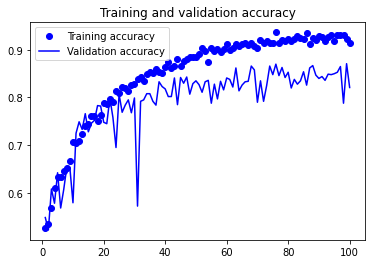

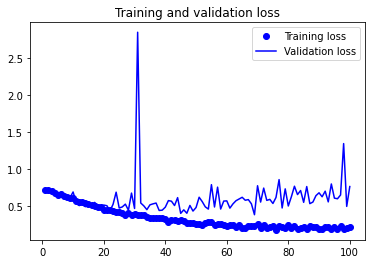

In [30]:
# 시각화
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [31]:
test_model = keras.models.load_model('feature_extraction.keras')
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f'테스트 정확도: {test_acc:.3f}')

63/63 [==============================] - 0s 2ms/step - loss: 5.0699 - accuracy: 0.9730
테스트 정확도: 0.973


#### [과제] 데이터 증식을 사용한 특성 추출

#### 사전 훈련된 모델 미세 조정하기
